In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math 
import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import classification_report

In [31]:
df = pd.read_csv('heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [33]:
df = df.drop(columns=['index','id'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
#converting the age column from days to years
def age_to_years(n):
    return math.floor(n / 365)
df['age'] = df['age'].apply(age_to_years)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#checking for missing values in columns
for column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    if (missing_count > 0):
        print(f"In '{column_name}' there are {missing_count} missing values")
    else:
        print(f"No missing values in {column_name}")

No missing values in age
No missing values in gender
No missing values in height
No missing values in weight
No missing values in ap_hi
No missing values in ap_lo
No missing values in cholesterol
No missing values in gluc
No missing values in smoke
No missing values in alco
No missing values in active
No missing values in cardio


#### Logistic Regression Model

In [43]:
X = df.drop('cardio',axis = 1)
y = df[['cardio']]
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0


In [44]:
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .33,
                                                   random_state = 0)

In [48]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [49]:
y_pred = classifier.predict(X_test.values)

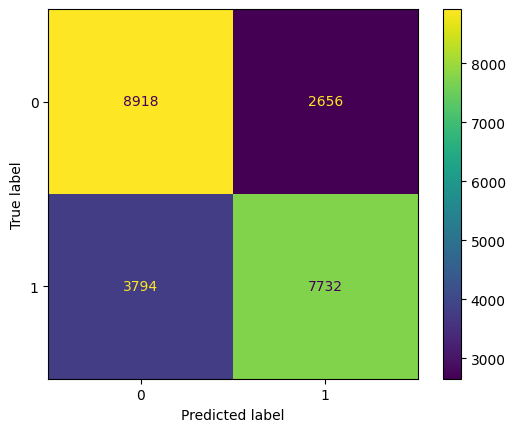

[[8918 2656]
 [3794 7732]]


In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(cm)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     11574
           1       0.74      0.67      0.71     11526

    accuracy                           0.72     23100
   macro avg       0.72      0.72      0.72     23100
weighted avg       0.72      0.72      0.72     23100

